In [82]:
import matplotlib.pyplot as plt

from sklearn import datasets

import numpy as np

In [52]:
class kNN:
    def __init__(self, k=1, alghoritm='euclid', task='classification'):
        self.k = k
        self.alghoritm = getattr(self, f"alghoritm_{alghoritm}")
        self.answer = getattr(self, task)
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        answer = []
        
        for X_test_el in X_test:
            pairs = []
            
            for X_train_el, y_train_el in zip(self.X_train, self.y_train):
                pairs.append((self.alghoritm(X_train_el, X_test_el), y_train_el))
        
            pairs.sort()
            
            answer.append(self.answer(pairs))
            
        return answer
    
    def alghoritm_euclid(self, X_train_el, X_test_el):
        return np.sum((X_train_el - X_test_el) ** 2)
    
    def classification(self, pairs_sorted):
        answers = [pair[1] for pair in pairs_sorted[:self.k]]
        
        return int(np.median(answers))
    
    def regression(self, pairs_sorted):
        answers = [pair[1] for pair in pairs_sorted[:self.k]]
        
        return np.mean(answers)

In [85]:
data = datasets.load_digits()
X, y = data['data'], data['target']

quar = X.shape[0] // 4
X_train, X_test, y_train, y_test = X[:-quar], X[-quar:], y[:-quar], y[-quar:]

In [86]:
from sklearn.metrics import accuracy_score

Text(0, 0.5, 'mse')

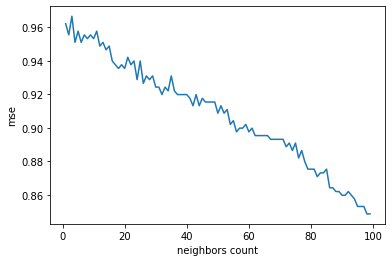

In [87]:
k_list = range(1, 100)
scores = []

for k in k_list:
    knn = kNN(k=k, task='classification')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    scores.append(accuracy_score(y_test, y_pred))

Text(0.5, 1.0, 'mse ~ k')

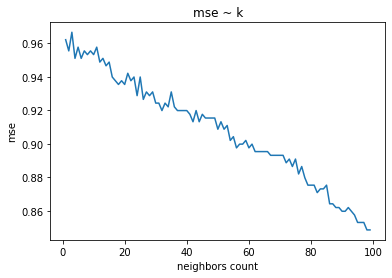

In [91]:
plt.plot(k_list, scores)
plt.xlabel('neighbors count')
plt.ylabel('mse')
plt.title('mse ~ k')

In [89]:
print("opt_k:", k_list[scores.index(max(scores))], "-", max(scores))

opt_k: 3 - 0.9665924276169265


In [76]:
data = datasets.load_breast_cancer()

X, y = data['data'], data['target']

quar = X.shape[0] // 4

X_train, X_test, y_train, y_test = X[:-quar], X[-quar:], y[:-quar], y[-quar:]

In [81]:
from sklearn.metrics import mean_absolute_error

knn = kNN(k=12, task='regression')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('kNN accuracy_score:', mean_absolute_error(y_test, y_pred))

kNN accuracy_score: 0.09741784037558684


Text(0, 0.5, 'mse')

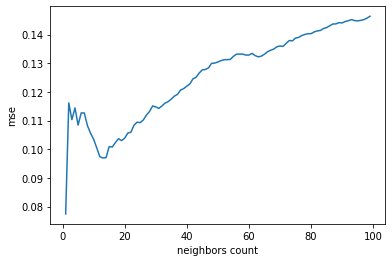

In [83]:
k_list = range(1, 100)
scores = []

for k in k_list:
    knn = kNN(k=k, task='regression')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))
    
plt.plot(k_list, scores)
plt.xlabel('neighbors count')
plt.ylabel('mse')

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print('RandomForestClassifier accuracy_score:', 1 - accuracy_score(y_test, y_pred))

RandomForestClassifier accuracy_score: 0.062360801781737196
